In [12]:
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np

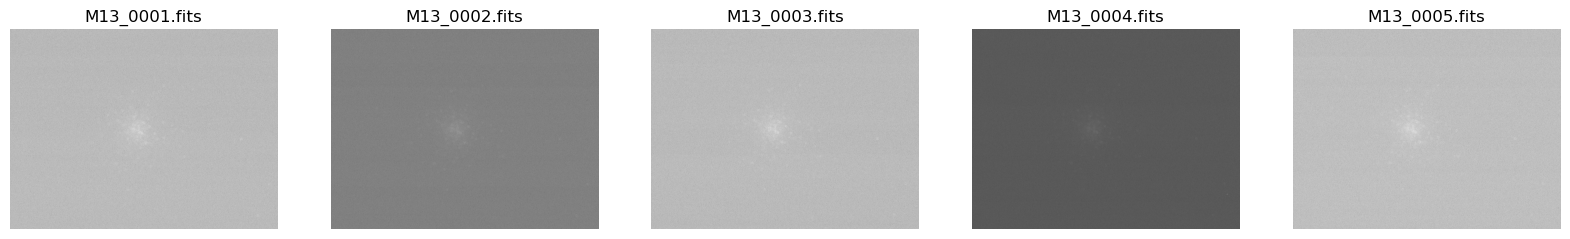

In [13]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
images = []
i = 1
while i < 6:
    with fits.open(f"M13_000{i}.fits") as hdul:
        header = hdul[0].header
        data = hdul[0].data
    images.append(data)
    ax = axes[i-1]
    ax.imshow(data, origin="lower", cmap="gray")
    ax.set_title(f"M13_000{i}.fits")
    ax.axis("off")
    i += 1
plt.show()

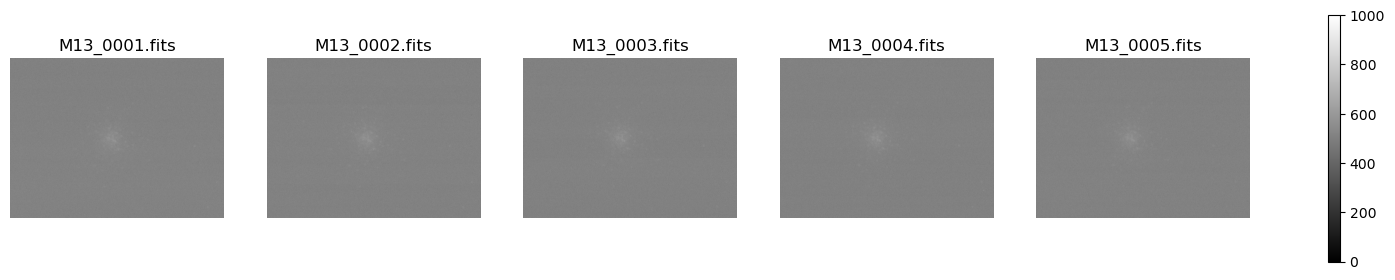

In [14]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for i, (ax, data) in enumerate(zip(axes, images), start=1):
    im = ax.imshow(data, origin="lower", cmap="gray", vmin=0, vmax=1000)
    ax.set_title(f"M13_000{i}.fits")
    ax.axis("off")
cbar = fig.colorbar(im, ax=axes.ravel().tolist(), shrink=0.8)
plt.show()

In [15]:
# 3.2) They all have a similar color

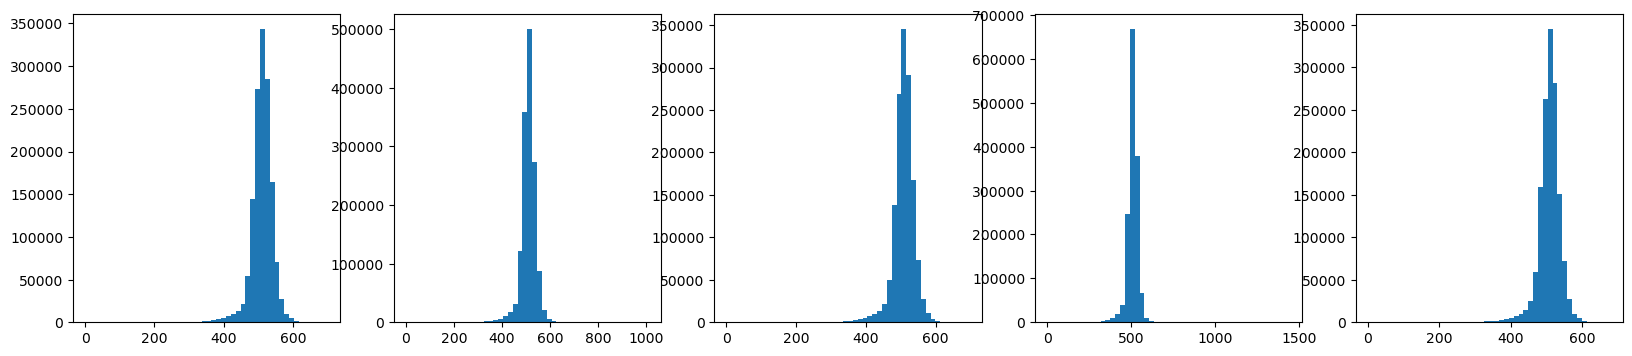

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, data, i in zip(axes, images, range(1, 6)):
    ax.hist(data.ravel(), bins=50)
plt.show()

In [17]:
# 3.3a) The x-axis ranges from  ~400 to ~600, the y ranges ~0 to ~700000
# 3.3b) The bin represents the number of groups the data is divided into with respect to the x axis.
# 3.3c) Most of the data is centered ~500
# 3.3d) The data is pretty concentrated ~450 to ~550

In [18]:
for data in images:
    mean_val = np.mean(data)
    median_val = np.median(data)
    print(mean_val)
    print(median_val)

510.4706668600796
512.0
509.7460150033157
511.0
508.0498729000884
510.0
507.90583554376656
509.0
508.7919920148099
510.0


In [19]:
# 3.3e) The data lists the mean and median. A little over 500 for each.

In [20]:
stack = np.stack(images)
combined = np.median(stack, axis=0)
combined_median_value = np.median(combined)
print(combined_median_value)

510.0


In [21]:
# 3.4.1) The new median value is 510

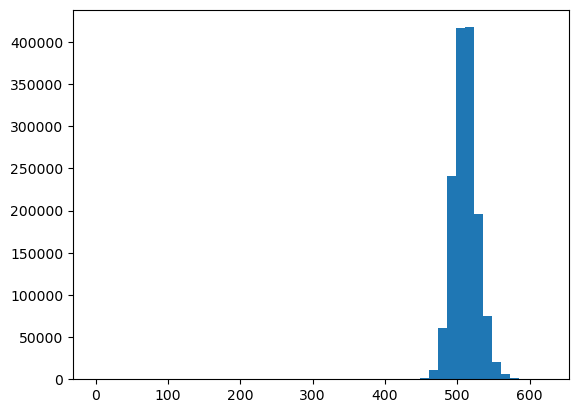

In [22]:
plt.hist(combined.ravel(), bins=50)
plt.show()

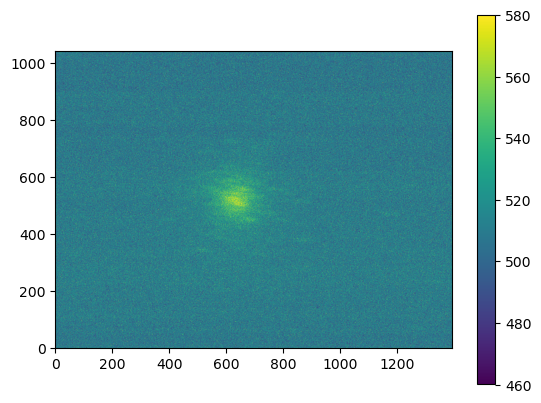

In [23]:
plt.imshow(combined, origin="lower", vmin=460, vmax=580)
plt.colorbar()
plt.show()

In [24]:
# 3.4.4) This image is much clearer than earlier

In [25]:
fits.writeto("combined.fits", combined, overwrite=True)